必要なライブラリのインポート


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import GPy
from GPy import kern as gp_kern
import numpy as np
from scipy.stats import norm
from sklearn.metrics import r2_score
import time

In [2]:
OUTPUT_LOG = True
NUM_CANDIDATES = 2

In [3]:
def debug_print(*args):
    if OUTPUT_LOG:
        print(*args)

データの読み込み


In [4]:
# データの読み込み
df = pd.read_csv(
    "../generate-poscars/data.csv",
    engine="python",
    encoding="utf-8",
)

# IDをインデックスに設定
df = df.set_index("ID")
debug_print(df)

# 重複行の確認（全データセットに対して）
duplicates = df[df.duplicated(keep=False)]
debug_print(duplicates)

# 'energy'列にデータがある行のみを抽出
df_with_energy = df.dropna(subset=["energy"])
debug_print(df_with_energy)

# 'energy'列にデータがない行のみを抽出
df_without_energy = df[df["energy"].isnull()].drop(columns=["energy"])
debug_print(df_without_energy)

min_index = df["energy"].idxmin()
min_value = min(df["energy"])
debug_print(min_index, min_value)

     Ni  Ni_Mg  Cu_Ni  Co_Ni  Zn_Ni  Mg  Cu_Mg  Co_Mg  Zn_Mg  Cu  Co_Cu  \
ID                                                                        
1     5     13     13     18     18   7     15     14     16   5     16   
2     9     11     16     11     16   7     15     17     15   5     18   
3     4     14     14     18     18   6     18     17     11   7     13   
4     5     13     14     16     19   6     16     17     14   4     11   
5     5     20     14     16     12   4     11     17     16   6     17   
..   ..    ...    ...    ...    ...  ..    ...    ...    ...  ..    ...   
106   7     14      7     18     19   5     13     17     18   7     19   
107   7     12     11     18     17   5     16     17     17   8     14   
108   4     15     19     13     17   5     14     19     14   1     16   
109  11      8     11     13     18   6     13     20     19   6     17   
110   6     12     12     11     25   8     14     18     12   8     17   

     Zn_Cu  Co  Zn_Co  Z

ガウス過程回帰の処理


In [5]:
# 特徴量とターゲット変数の分割
X = df_with_energy.iloc[:, :-1]
y = df_with_energy.iloc[:, -1:]

# ガウス過程回帰モデルの設定と訓練
num = X.shape[1]
kernel = gp_kern.RBF(num) * gp_kern.Bias(num) + gp_kern.Linear(num) * gp_kern.Bias(num)
model = GPy.models.GPRegression(X.values, y.values, kernel=kernel, normalizer=True)
model.optimize()

データの y と予測された y'の比較


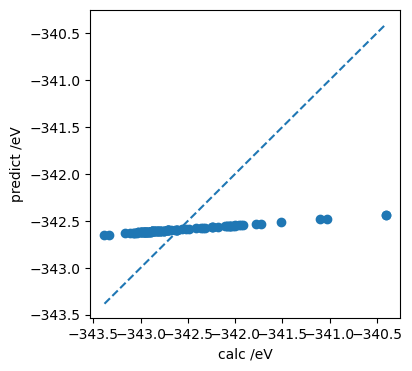

In [6]:
pred_y, _ = model.predict(X.values)
if (OUTPUT_LOG):
  fig_vs = plt.figure(figsize=(4, 4))
  plt.scatter(y.values.flatten(), pred_y.flatten())
  plt.plot([min(y.values), max(y.values)], [min(y.values), max(y.values)], ls="--")
  plt.xlabel("calc /eV")
  plt.ylabel("predict /eV")
  plt.show()

In [7]:
# 相関係数と決定係数の計算
correlation_coefficient = np.corrcoef(y.values.flatten(), pred_y.flatten())[0, 1]
r2 = r2_score(y.values, pred_y)

debug_print(f"相関係数: {correlation_coefficient:.3f}")
debug_print(f"決定係数 (R²): {r2:.3f}")

相関係数: 1.000
決定係数 (R²): 0.140


ガウス過程回帰の結果のプロット(1 次元プロット)


[(0, 4), (1, 14), (2, 12), (3, 17), (4, 21), (5, 4), (6, 14), (7, 17), (8, 19), (9, 9), (10, 15), (11, 13), (12, 6), (13, 23), (14, 4)]
Ni


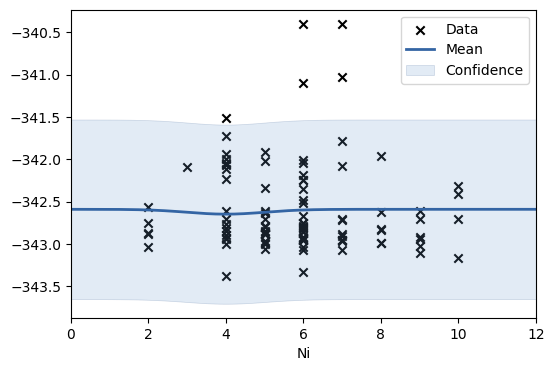

[(0, 4), (1, 14), (2, 12), (3, 17), (4, 21), (5, 4), (6, 14), (7, 17), (8, 19), (9, 9), (10, 15), (11, 13), (12, 6), (13, 23), (14, 4)]
Ni_Mg


<Figure size 640x480 with 0 Axes>

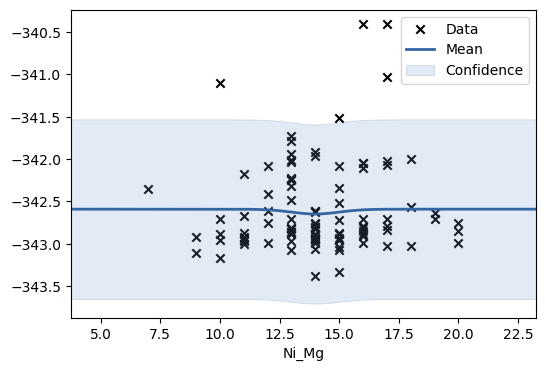

[(0, 4), (1, 14), (2, 12), (3, 17), (4, 21), (5, 4), (6, 14), (7, 17), (8, 19), (9, 9), (10, 15), (11, 13), (12, 6), (13, 23), (14, 4)]
Cu_Ni


<Figure size 640x480 with 0 Axes>

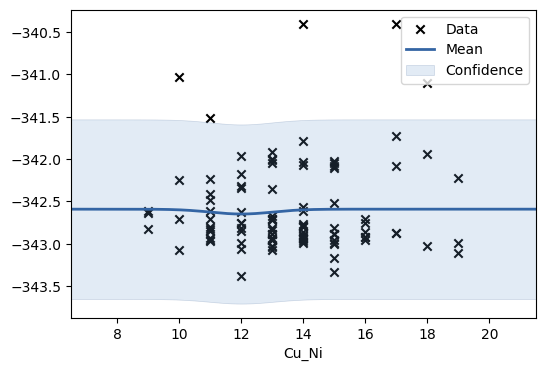

[(0, 4), (1, 14), (2, 12), (3, 17), (4, 21), (5, 4), (6, 14), (7, 17), (8, 19), (9, 9), (10, 15), (11, 13), (12, 6), (13, 23), (14, 4)]
Co_Ni


<Figure size 640x480 with 0 Axes>

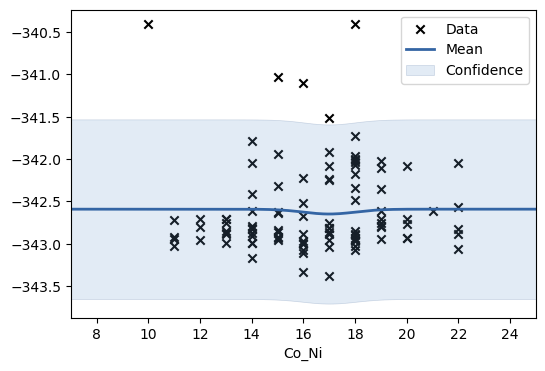

[(0, 4), (1, 14), (2, 12), (3, 17), (4, 21), (5, 4), (6, 14), (7, 17), (8, 19), (9, 9), (10, 15), (11, 13), (12, 6), (13, 23), (14, 4)]
Zn_Ni


<Figure size 640x480 with 0 Axes>

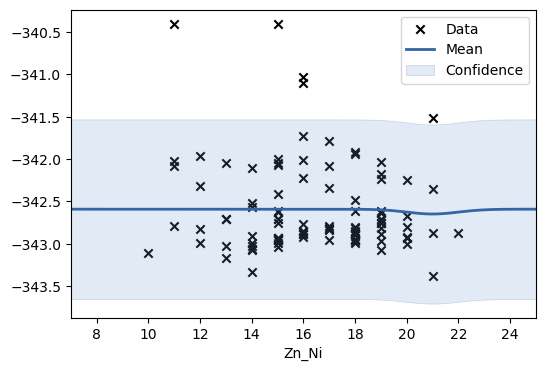

[(0, 4), (1, 14), (2, 12), (3, 17), (4, 21), (5, 4), (6, 14), (7, 17), (8, 19), (9, 9), (10, 15), (11, 13), (12, 6), (13, 23), (14, 4)]
Mg


<Figure size 640x480 with 0 Axes>

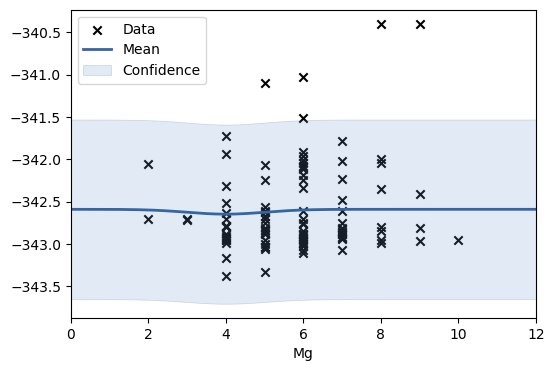

[(0, 4), (1, 14), (2, 12), (3, 17), (4, 21), (5, 4), (6, 14), (7, 17), (8, 19), (9, 9), (10, 15), (11, 13), (12, 6), (13, 23), (14, 4)]
Cu_Mg


<Figure size 640x480 with 0 Axes>

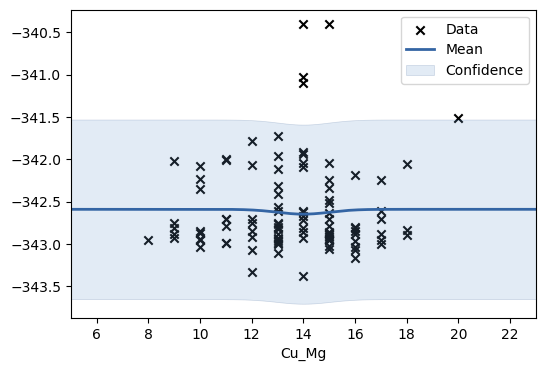

[(0, 4), (1, 14), (2, 12), (3, 17), (4, 21), (5, 4), (6, 14), (7, 17), (8, 19), (9, 9), (10, 15), (11, 13), (12, 6), (13, 23), (14, 4)]
Co_Mg


<Figure size 640x480 with 0 Axes>

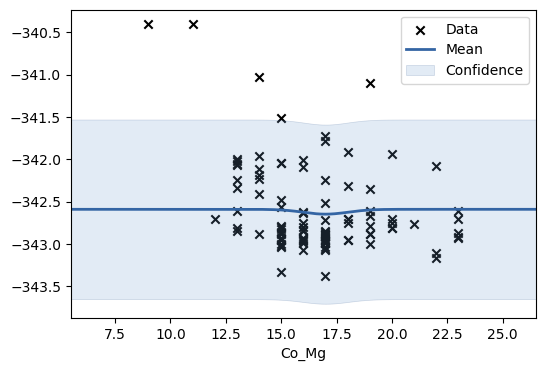

[(0, 4), (1, 14), (2, 12), (3, 17), (4, 21), (5, 4), (6, 14), (7, 17), (8, 19), (9, 9), (10, 15), (11, 13), (12, 6), (13, 23), (14, 4)]
Zn_Mg


<Figure size 640x480 with 0 Axes>

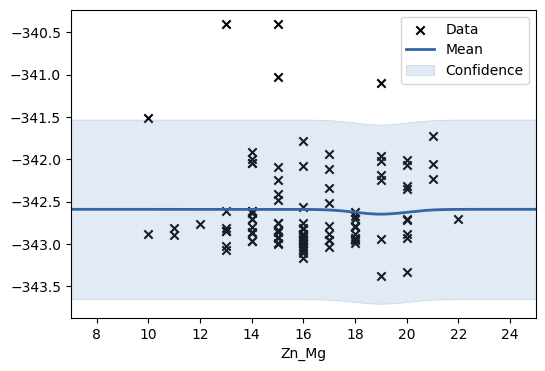

[(0, 4), (1, 14), (2, 12), (3, 17), (4, 21), (5, 4), (6, 14), (7, 17), (8, 19), (9, 9), (10, 15), (11, 13), (12, 6), (13, 23), (14, 4)]
Cu


<Figure size 640x480 with 0 Axes>

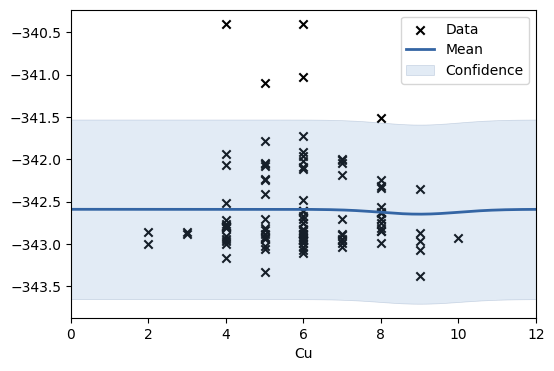

[(0, 4), (1, 14), (2, 12), (3, 17), (4, 21), (5, 4), (6, 14), (7, 17), (8, 19), (9, 9), (10, 15), (11, 13), (12, 6), (13, 23), (14, 4)]
Co_Cu


<Figure size 640x480 with 0 Axes>

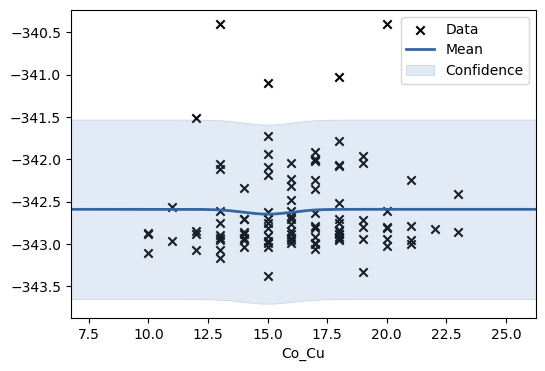

[(0, 4), (1, 14), (2, 12), (3, 17), (4, 21), (5, 4), (6, 14), (7, 17), (8, 19), (9, 9), (10, 15), (11, 13), (12, 6), (13, 23), (14, 4)]
Zn_Cu


<Figure size 640x480 with 0 Axes>

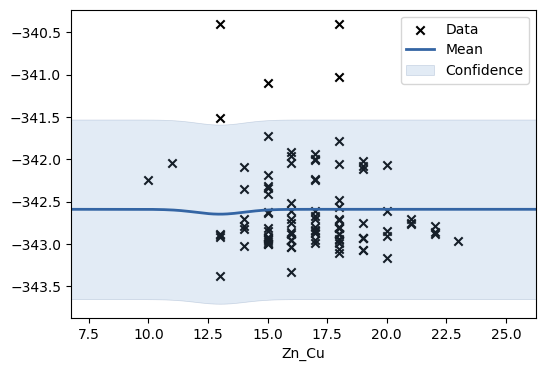

[(0, 4), (1, 14), (2, 12), (3, 17), (4, 21), (5, 4), (6, 14), (7, 17), (8, 19), (9, 9), (10, 15), (11, 13), (12, 6), (13, 23), (14, 4)]
Co


<Figure size 640x480 with 0 Axes>

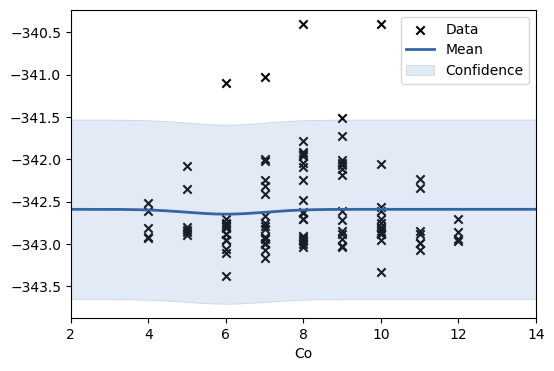

[(0, 4), (1, 14), (2, 12), (3, 17), (4, 21), (5, 4), (6, 14), (7, 17), (8, 19), (9, 9), (10, 15), (11, 13), (12, 6), (13, 23), (14, 4)]
Zn_Co


<Figure size 640x480 with 0 Axes>

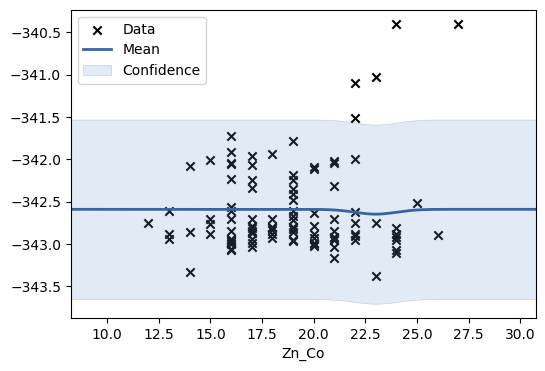

[(0, 4), (1, 14), (2, 12), (3, 17), (4, 21), (5, 4), (6, 14), (7, 17), (8, 19), (9, 9), (10, 15), (11, 13), (12, 6), (13, 23), (14, 4)]
Zn


<Figure size 640x480 with 0 Axes>

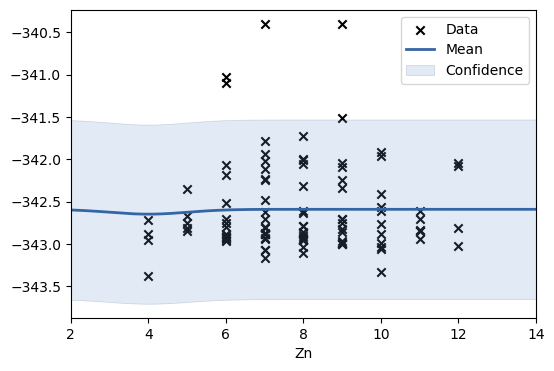

<Figure size 640x480 with 0 Axes>

In [8]:
# save_dir = "./images/"
# print(X.loc[min_index,:])
if OUTPUT_LOG:
    for i in range(len(X.columns)):
        vis_dim = [(vis1, vis2) for vis1, vis2 in enumerate(X.loc[min_index, :])]

        debug_print(vis_dim)

        view_variable = i
        vis_dim.pop(view_variable)
        debug_print(X.columns[view_variable])
        # vis_dim[0] =(0,0)
        # vis_dim[1] =(1,1)
        # Optimize後
        fig = plt.figure(figsize=(6, 4))
        # fig.suptitle(X.columns[i])

        ax = fig.add_subplot(111)
        ax.set_xlabel(X.columns[i])
        model.plot(fixed_inputs=vis_dim, plot_density=False, ax=ax)
        # if save_dir != None:
        #     plt.savefig(os.path.join(save_dir,
        #                 ""+X.columns[i]+"_.png"))
        # plt.ylim(-4,0)
        plt.show()
        plt.clf()

---


ガウス過程回帰の結果のプロット(2 次元プロット)


In [9]:
# # gd = [40,45,50,55,60]
# # eu = [2,4,6,8,10]
# # sm = [2,4,6,8,10]
# Zn = [2,4,6,8,10]


# for i in Zn:
#     fig = plt.figure(figsize=(6, 4))
#     fig.suptitle(X.columns[0]+ str(i))
#     ax = fig.add_subplot(111)
#     ax.set_xlabel(X.columns[1])
#     ax.set_ylabel(X.columns[2])

#     # ax.contour( cmap="jet", levels=10, alpha=1)
#     model.plot(
#                 fixed_inputs=[(0, i)],
#                 plot_data=False,
#                 ax=ax,
#                 color=plt.get_cmap('jet')
#                 )

ベイズ最適化


獲得関数


In [10]:
# 獲得関数
def acquisition_lcb(mean, std, kappa):
    a = mean - kappa * std
    return a


def acquisition_EI(mean, std, min_value, xi=0.001):
    imp = min_value - mean - xi
    Z = imp / std
    ei = imp * norm.cdf(Z) + std * norm.pdf(Z)
    return ei

予測する特徴量の範囲を指定


In [11]:
progress_count = 0
progress_level = 0
total_iterations = df.shape[0] - df_with_energy.shape[0]
progress_interval = total_iterations // 50 + 1

debug_print(total_iterations)

start_time = time.time()


def display_progress():
    global progress_count
    global progress_level
    progress_count += 1

    current_level = progress_count // progress_interval

    if not (current_level > progress_level or progress_count == total_iterations):
        return

    progress_level = current_level
    elapsed_time = time.time() - start_time
    debug_print(
        f"Progress: {progress_count}/{total_iterations} ({progress_count/total_iterations*100:.2f}%), Elapsed time: {elapsed_time:.2f}s"
    )

    debug_print(f"progress_count: {progress_count}, progress_level: {progress_level}")

10


各特徴量での獲得関数の計算


In [12]:
means = []
stds = []
acs_ei = []
acs_lcb = []

itera = df_without_energy.values

debug_print(itera)

for item in itera:
    display_progress()

    # 期待値と分散
    mean, val = model.predict(np.array(item).reshape(1, -1))
    # 標準偏差
    std = np.sqrt(val)

    # 獲得関数(EI)
    ac_ei = acquisition_EI(mean, std, min_value)
    # 獲得関数(LCB)
    ac_lcb = acquisition_lcb(mean, std, 7)

    # それぞれをリストにまとめる
    means.append(mean.flatten()[0])
    stds.append(std.flatten()[0])
    acs_ei.append(ac_ei.flatten()[0])
    acs_lcb.append(ac_lcb.flatten()[0])

[[ 3 16 12 18 20  5 17 17 12  4 15 20  7 20  6]
 [ 5 13 15 16 18  6 15 16 16  6 15 15  9 19  8]
 [ 3 11 17 17 21  7 12 22 13  6 15 16  6 18  8]
 [ 7 11 13 17 17  6 15 16 18  5 19 15  5 22  6]
 [ 5  9 20 18 15  7  8 20 21  7 14 16  9 14  9]
 [ 7 14  7 18 19  5 13 17 18  7 19 19  6 18  5]
 [ 7 12 11 18 17  5 16 17 17  8 14 15  8 19  8]
 [ 4 15 19 13 17  5 14 19 14  1 16 21 10 16  8]
 [11  8 11 13 18  6 13 20 19  6 17 19  9 16  6]
 [ 6 12 12 11 25  8 14 18 12  8 17 13 12 14 10]]
Progress: 1/10 (10.00%), Elapsed time: 0.02s
progress_count: 1, progress_level: 1
Progress: 2/10 (20.00%), Elapsed time: 0.02s
progress_count: 2, progress_level: 2
Progress: 3/10 (30.00%), Elapsed time: 0.04s
progress_count: 3, progress_level: 3
Progress: 4/10 (40.00%), Elapsed time: 0.08s
progress_count: 4, progress_level: 4
Progress: 5/10 (50.00%), Elapsed time: 0.08s
progress_count: 5, progress_level: 5
Progress: 6/10 (60.00%), Elapsed time: 0.08s
progress_count: 6, progress_level: 6
Progress: 7/10 (70.00%), El

提案された特徴量を Pandas データフレームとして出力


In [13]:
result_df = pd.DataFrame(df_without_energy)
result_df = result_df.assign(mean=means, std=stds, EI=acs_ei, LCB=acs_lcb)

In [14]:
# LCBが最小の行を取得
result_df_sort = result_df.sort_values("LCB", ascending=True)
min_lcb_id = result_df_sort.index[0]

debug_print("ID with the minimum LCB value:", min_lcb_id)

ID with the minimum UCB value: 107


EI を降順にプロット


In [15]:
result_df_sort = result_df.sort_values("EI", ascending=False)
# 上位20個を表示
debug_print(result_df_sort[:20])
# 下位20個を表示
# result_df_sort[-20:]

     Ni  Ni_Mg  Cu_Ni  Co_Ni  Zn_Ni  Mg  Cu_Mg  Co_Mg  Zn_Mg  Cu  Co_Cu  \
ID                                                                        
107   7     12     11     18     17   5     16     17     17   8     14   
109  11      8     11     13     18   6     13     20     19   6     17   
103   3     11     17     17     21   7     12     22     13   6     15   
105   5      9     20     18     15   7      8     20     21   7     14   
108   4     15     19     13     17   5     14     19     14   1     16   
110   6     12     12     11     25   8     14     18     12   8     17   
106   7     14      7     18     19   5     13     17     18   7     19   
101   3     16     12     18     20   5     17     17     12   4     15   
104   7     11     13     17     17   6     15     16     18   5     19   
102   5     13     15     16     18   6     15     16     16   6     15   

     Zn_Cu  Co  Zn_Co  Zn        mean       std        EI         UCB  
ID                         

LCB を昇順にプロット


In [16]:
result_df_sort = result_df.sort_values("LCB", ascending=True)
# 上位20個を表示
debug_print(result_df_sort[:20])
# 下位20個を表示
# result_df_sort[-20:]

     Ni  Ni_Mg  Cu_Ni  Co_Ni  Zn_Ni  Mg  Cu_Mg  Co_Mg  Zn_Mg  Cu  Co_Cu  \
ID                                                                        
107   7     12     11     18     17   5     16     17     17   8     14   
109  11      8     11     13     18   6     13     20     19   6     17   
110   6     12     12     11     25   8     14     18     12   8     17   
105   5      9     20     18     15   7      8     20     21   7     14   
103   3     11     17     17     21   7     12     22     13   6     15   
108   4     15     19     13     17   5     14     19     14   1     16   
106   7     14      7     18     19   5     13     17     18   7     19   
101   3     16     12     18     20   5     17     17     12   4     15   
104   7     11     13     17     17   6     15     16     18   5     19   
102   5     13     15     16     18   6     15     16     16   6     15   

     Zn_Cu  Co  Zn_Co  Zn        mean       std        EI         UCB  
ID                         

In [17]:
result_df_sort = result_df.sort_values("mean", ascending=False)
debug_print(result_df_sort[:20])
# result_df_sort[-20:]

     Ni  Ni_Mg  Cu_Ni  Co_Ni  Zn_Ni  Mg  Cu_Mg  Co_Mg  Zn_Mg  Cu  Co_Cu  \
ID                                                                        
102   5     13     15     16     18   6     15     16     16   6     15   
104   7     11     13     17     17   6     15     16     18   5     19   
101   3     16     12     18     20   5     17     17     12   4     15   
106   7     14      7     18     19   5     13     17     18   7     19   
108   4     15     19     13     17   5     14     19     14   1     16   
105   5      9     20     18     15   7      8     20     21   7     14   
110   6     12     12     11     25   8     14     18     12   8     17   
103   3     11     17     17     21   7     12     22     13   6     15   
109  11      8     11     13     18   6     13     20     19   6     17   
107   7     12     11     18     17   5     16     17     17   8     14   

     Zn_Cu  Co  Zn_Co  Zn        mean       std        EI         UCB  
ID                         

候補 3 つの ID を出力


In [18]:
result_df_sort = result_df.sort_values("LCB", ascending=True)
print(result_df_sort.head(NUM_CANDIDATES).index.tolist())

[107, 109]
